In [1]:
import numpy as np
import pandas as pd
from scipy import stats
 
# グラフ描画
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline


In [2]:
# グラフを横長にする
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
 
# 統計モデル
#import statsmodels.api as sm
import pandas.tseries as sm

In [3]:
f3 = '%Y/%m/%d %H:%M'
my_parser = lambda date: pd.datetime.strptime(date, f3)

In [53]:
dataNormal = pd.read_csv('btc.csv',parse_dates=True,date_parser=my_parser)
dataNormal.head(5)

,date,begin,high,low,end
0,2018/2/16 15:00,10099.9063,10112.8047,10027.1211,10027.1211
1,2018/2/16 14:00,10002.7793,10145.4453,10002.4316,10099.9063
2,2018/2/16 13:00,10121.5996,10125.2246,9955.7051,10002.7793
3,2018/2/16 12:00,10193.3984,10218.4492,10056.2695,10121.5996
4,2018/2/16 11:00,10300.0098,10300.5430,10167.4785,10193.3984


In [50]:
#dataNormal= pd.to_datetime(dataNormal['date'],format='%Y/%m/%d %H:%M')


0   2018-02-16 15:00:00
1   2018-02-16 14:00:00
2   2018-02-16 13:00:00
3   2018-02-16 12:00:00
4   2018-02-16 11:00:00
Name: date, dtype: datetime64[ns]

In [58]:
dataNormal.begin.pct_change().fillna(0.0)*100
dataNormal.head(5)
#(dataNormal['high']-dataNormal['low'])/dataNormal['begin']*100.head(5)

,date,begin,high,low,end
0,2018/2/16 15:00,10099.9063,10112.8047,10027.1211,10027.1211
1,2018/2/16 14:00,10002.7793,10145.4453,10002.4316,10099.9063
2,2018/2/16 13:00,10121.5996,10125.2246,9955.7051,10002.7793
3,2018/2/16 12:00,10193.3984,10218.4492,10056.2695,10121.5996
4,2018/2/16 11:00,10300.0098,10300.5430,10167.4785,10193.3984


In [80]:
df1 = pd.read_csv('interpolation.csv',parse_dates=True,date_parser=my_parser)
df1.tail()

,btcdate,btcbegin,btchigh,btclow,btcend,cboedate,cboebegin,cboehigh,cboelow,cboeend,cboevolumn
1215,2017/12/11 11:00,16162.8467,16503.3926,16004.5996,16502.0645,2017/12/11 11:00,17540.0,18660.0,17400.0,18660.0,7.0
1216,2017/12/11 10:00,15459.7676,16179.0859,15458.7402,16162.8467,2017/12/11 10:00,17000.0,17260.0,17000.0,17260.0,3.0
1217,2017/12/11 9:00,15097.2529,15546.0771,15060.0107,15459.7676,2017/12/11 9:00,16430.0,16800.0,16430.0,16800.0,2.0
1218,2017/12/11 8:00,14646.6904,15916.0957,14643.7852,15097.2529,2017/12/11 8:00,NaN,NaN,NaN,NaN,NaN
1219,2017/12/11 7:00,14690.4258,15184.1602,14538.3965,14646.6904,2017/12/11 7:00,14710.0,14710.0,14710.0,14710.0,1.0


In [81]:
df1['btcdate'] = pd.to_datetime(df1['btcdate'],format='%Y/%m/%d %H:%M')
df1['cboedate'] = pd.to_datetime(df1['cboedate'],format='%Y/%m/%d %H:%M')
df1.head(5)


,btcdate,btcbegin,btchigh,btclow,btcend,cboedate,cboebegin,cboehigh,cboelow,cboeend,cboevolumn
0,2018-02-16 14:00:00,10002.7793,10145.4453,10002.4316,10099.9063,2018-02-16 14:00:00,10130.0,10170.0,10090.0,10120.0,29.0
1,2018-02-16 13:00:00,10121.5996,10125.2246,9955.7051,10002.7793,2018-02-16 13:00:00,10060.0,10140.0,9980.0,10110.0,106.0
2,2018-02-16 12:00:00,10193.3984,10218.4492,10056.2695,10121.5996,2018-02-16 12:00:00,10180.0,10190.0,10050.0,10060.0,56.0
3,2018-02-16 11:00:00,10300.0098,10300.5430,10167.4785,10193.3984,2018-02-16 11:00:00,10240.0,10260.0,10170.0,10200.0,48.0
4,2018-02-16 10:00:00,10237.0479,10300.0098,10155.6904,10300.0098,2018-02-16 10:00:00,10240.0,10320.0,10200.0,10230.0,102.0


In [82]:
df1 = df1.interpolate(method='linear')
df1.tail()

,btcdate,btcbegin,btchigh,btclow,btcend,cboedate,cboebegin,cboehigh,cboelow,cboeend,cboevolumn
1215,2017-12-11 11:00:00,16162.8467,16503.3926,16004.5996,16502.0645,2017-12-11 11:00:00,17540.0,18660.0,17400.0,18660.0,7.0
1216,2017-12-11 10:00:00,15459.7676,16179.0859,15458.7402,16162.8467,2017-12-11 10:00:00,17000.0,17260.0,17000.0,17260.0,3.0
1217,2017-12-11 09:00:00,15097.2529,15546.0771,15060.0107,15459.7676,2017-12-11 09:00:00,16430.0,16800.0,16430.0,16800.0,2.0
1218,2017-12-11 08:00:00,14646.6904,15916.0957,14643.7852,15097.2529,2017-12-11 08:00:00,15570.0,15755.0,15570.0,15755.0,1.5
1219,2017-12-11 07:00:00,14690.4258,15184.1602,14538.3965,14646.6904,2017-12-11 07:00:00,14710.0,14710.0,14710.0,14710.0,1.0


In [83]:
#df1.corr

In [84]:
from sklearn import preprocessing


In [86]:
df1 = df1.drop(['cboedate'],axis=1)
df1 = df1.set_index('btcdate')


In [87]:
df1 = df1.sort_index(ascending=True)
df1.head(5)

,btcbegin,btchigh,btclow,btcend,cboebegin,cboehigh,cboelow,cboeend,cboevolumn
btcdate,,,,,,,,,
2017-12-11 07:00:00,14690.4258,15184.1602,14538.3965,14646.6904,14710.0,14710.0,14710.0,14710.0,1.0
2017-12-11 08:00:00,14646.6904,15916.0957,14643.7852,15097.2529,15570.0,15755.0,15570.0,15755.0,1.5
2017-12-11 09:00:00,15097.2529,15546.0771,15060.0107,15459.7676,16430.0,16800.0,16430.0,16800.0,2.0
2017-12-11 10:00:00,15459.7676,16179.0859,15458.7402,16162.8467,17000.0,17260.0,17000.0,17260.0,3.0
2017-12-11 11:00:00,16162.8467,16503.3926,16004.5996,16502.0645,17540.0,18660.0,17400.0,18660.0,7.0


In [95]:
df1 = df1.reset_index(drop=True)
#df1.loc[0:]

In [121]:
from sklearn import linear_model

dataTrain = df1.loc[1:1000]
dataTest = df1.loc[1001:]
# print df.head()

x_train = dataTrain[['cboebegin', 'cboehigh','cboelow','cboeend','cboevolumn']].values.reshape(-1,5)
y_train = dataTrain['btcbegin'].values

x_test = dataTest[['cboebegin', 'cboehigh','cboelow','cboeend','cboevolumn']].values.reshape(-1,5)
y_test = dataTest['btcbegin'].values

ols = linear_model.LinearRegression(normalize=True)

model = ols.fit(x_train, y_train)

print(model.coef_)
print (model.predict(x_test)[0:5])
print (y_test[0:5])



[ 1.18033869 -0.26525802 -0.28853173  0.2661704  -0.31340009]
[ 8347.55567616  8437.63505543  8267.72326988  8188.50192055  8097.54016343]
[ 8059.0674  7970.1094  7795.1309  7867.1465  7681.9551]


In [135]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])     
model = model.fit(x_train, y_train)
model.named_steps['linear'].coef_
print (model.predict(x_test)[0:5])
print (y_test[0:5])

[ 7840.76860547  8073.45631303  7789.29227455  7716.85020866  7570.98114733]
[ 8059.0674  7970.1094  7795.1309  7867.1465  7681.9551]


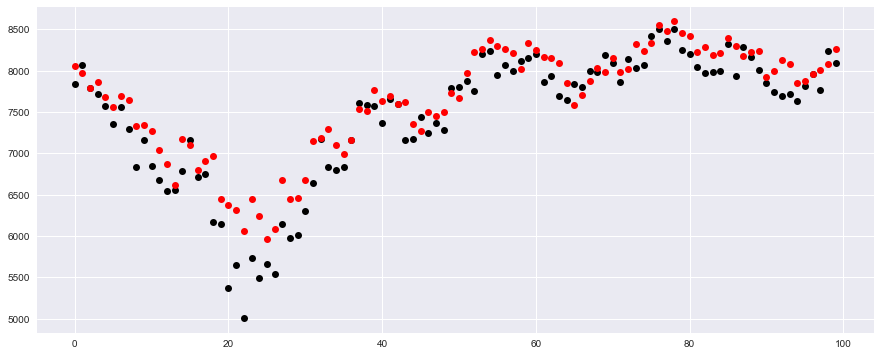

In [136]:
plt.plot(range(100),model.predict(x_test)[0:100], 'o', color='black');
plt.plot(range(100),y_test[0:100], 'o', color='red');

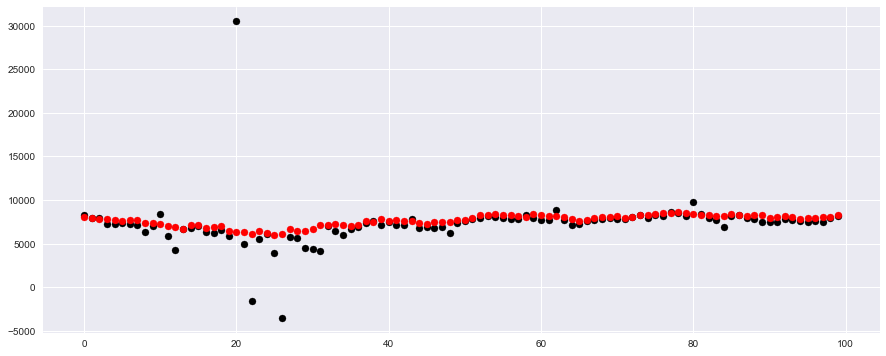

In [128]:
plt.scatter(range(100),model.predict(x_test)[0:100], color='black');
plt.scatter(range(100),y_test[0:100], color='red');